In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn import externals
from io import StringIO
import pydotplus
import matplotlib.image as mpimg 
from sklearn.tree import export_graphviz

In [2]:
df = pd.read_csv('file:///C://Users/Lenovo/Desktop/Data/Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Tax,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Tax              600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
df.shape

(600, 6)

In [5]:
def split(num):
    if num < 30000:
        return 'Risky'
    else:
        return 'Good'
    
df.Tax = df.Tax.apply(split)

In [6]:
df['Tax'].head()

0    Good
1    Good
2    Good
3    Good
4    Good
Name: Tax, dtype: object

Good     476
Risky    124
Name: Tax, dtype: int64


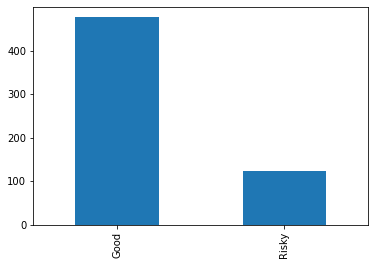

In [7]:
df['Tax'].value_counts(sort=True).plot.bar()
print(df['Tax'].value_counts())

In [8]:
le = LabelEncoder()
df1 = df[['Undergrad','Marital.Status','Urban']].apply(le.fit_transform)

In [9]:
df = df.drop(columns={'Undergrad','Marital.Status','Urban'}, axis=1)

In [10]:
df = pd.concat([df, df1], axis=1, sort=False)
df.head()

,Tax,City.Population,Work.Experience,Undergrad,Marital.Status,Urban
0,Good,50047,10,0,2,1
1,Good,134075,18,1,0,1
2,Good,160205,30,0,1,1
3,Good,193264,15,1,2,1
4,Good,27533,28,0,1,0


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x = df.iloc[:,1:6]
y = df.iloc[:,0]

In [13]:
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.2)

In [14]:
y_train.value_counts()

Good     381
Risky     99
Name: Tax, dtype: int64

# Decision Tree Model

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
model = DecisionTreeClassifier(max_features=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_features=3)

In [17]:
pred_train = model.predict(x_train)

In [18]:
accuracy_score(y_train,pred_train)

1.0

In [19]:
confusion_matrix(y_train,pred_train)

array([[381,   0],
       [  0,  99]], dtype=int64)

In [20]:
pred_test= model.predict(x_test)

In [21]:
accuracy_score(y_test,pred_test)

0.6583333333333333

In [22]:
confusion_matrix(y_test,pred_test)

array([[74, 21],
       [20,  5]], dtype=int64)

In [23]:
dff = pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})
dff

,Actual,Predicted
70,Good,Good
278,Risky,Good
489,Good,Good
335,Good,Good
352,Risky,Good
...,...,...
65,Good,Good
345,Good,Good
136,Good,Good
135,Risky,Risky


In [24]:
col = list(df.columns)
col

['Tax',
 'City.Population',
 'Work.Experience',
 'Undergrad',
 'Marital.Status',
 'Urban']

In [25]:
target = col[0]
predictors = col[1:6]

In [26]:
dot = StringIO()

In [27]:
export_graphviz(model, out_file = dot ,filled = True,rounded =True,feature_names = predictors,class_names = target, impurity = False)

In [28]:
graph = pydotplus.graph_from_dot_data(dot.getvalue())

In [29]:
model.feature_importances_

array([0.5339399 , 0.27523965, 0.06362445, 0.09099067, 0.03620533])

In [30]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

fi

,feature,importance
0,City.Population,0.533940
1,Work.Experience,0.275240
3,Marital.Status,0.090991
2,Undergrad,0.063624
4,Urban,0.036205
